Import necessary packages:

In [1]:
import h5py
import matplotlib.pyplot as plt

Load the dataset:

In [2]:
with h5py.File('CoCaHis.hdf5', 'r') as f:
    raw_images = f["HE/raw"][()]
    sn1_images = f["HE/sn1"][()]
    sn2_images = f["HE/sn2"][()]
    gt = f["GT/GT_majority_vote"][()]
    
    trtst = f["HE/"].attrs["train_test_split"]
    patients = f["HE/"].attrs["patient_num"]
    img_num = f["HE/"].attrs["image_num"]
    
gts = [] #ground truth annotations by Annotator i
with h5py.File('CoCaHis.hdf5', 'r') as f:
    for i in range(1,8):
        gts.append(f["GT/GT"+str(i)][()])

Visualize one raw and stain normalized images with ground truth labels:

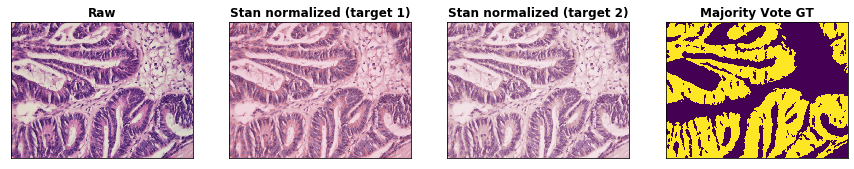

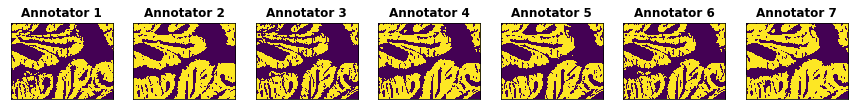

In [3]:
selected_image = 43
names = ["Raw","Stan normalized (target 1)","Stan normalized (target 2)","Majority Vote GT"]

f, axarr = plt.subplots(1,4,figsize=(15,3))
axarr[0].imshow(raw_images[selected_image])
axarr[1].imshow(sn1_images[selected_image])
axarr[2].imshow(sn2_images[selected_image])
axarr[3].imshow(gt[selected_image])
for ax,name in zip(axarr,names):
    ax.set_title(name,fontname="sans-serif",fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("up.png")
plt.show()
f, axarr = plt.subplots(1,7,figsize=(15,3))
for i,ax in enumerate(axarr):
    ax.set_title("Annotator "+str(i+1),fontname="sans-serif",fontweight="bold")
    ax.imshow(gts[i][selected_image])
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("down.png")
plt.show()

For selected image in the dataset, check patient and image numbers. Also, check if selected image belongs to the train or test set:

In [4]:
print("Selected image belongs to the patient number", patients[selected_image],
      "and it is the image number", img_num[selected_image], "of that patient.")
print("Selected image belongs to the" ,trtst[selected_image], "set")

Selected image belongs to the patient number 6 and it is the image number 2 of that patient.
Selected image belongs to the test set
